# Evaluating a classification model

In [1]:
# Model evaluation procedures
#rain/test split
#K-fold cross-validation

#Model evaluation metrics
#-Regression problems: mean absolute error, mean squared error, root mean squared error
#-Classification problems: classification accuracy  


In [2]:
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names=["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
pima=pd.read_csv(url, header=None, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Question: can we predict the diabetes status of a patient given their health measurements?

In [5]:
feature_cols=["pregnant", "insulin", "bmi", "age"]
x=pima[feature_cols]
y=pima.label

In [6]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred_class=logreg.predict(x_test)

In [9]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


In [10]:
#Null accuracy: accuracy that could be achieved by always predicting the most frequent class
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [11]:
#calculate the percentage of ones
y_test.mean()

0.32291666666666669

In [12]:
#calculate the percentage of zeros
1-y_test.mean()

0.67708333333333326

In [15]:
#calculate null accuracy (for binary  classification problems coded as 0/1)
max(y_test.mean(), 1-y_test.mean())

0.67708333333333326

In [16]:
#calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

In [17]:

# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Conclusion:

###Classification accuracy is the easiest classification metric to understand

#But, it does not tell you the underlying distribution of response values
#And, it does not tell you what "types" of errors your classifier is making

# Confusion Matrix

In [22]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [24]:
print ("True", y_test.values[0:25])
print ("Pred", y_pred_class[0:25])


True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
confusion=metrics.confusion_matrix(y_test, y_pred_class)
TP=confusion[1, 1]
TN=confusion[0, 0]
FP=confusion[0, 1]
FN=confusion[1, 0]

In [30]:
#overall accuracy
print ((TP+TN)/float(TP+TN+FP+FN))
print (metrics.accuracy_score(y_test,  y_pred_class))

0.692708333333
0.692708333333


In [27]:
#sensitivity: when the actual value is positive, how often is the prediction correct
#also known as recall
print (TP/float(TP+FN))
print (metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


In [29]:
#specificity: when the actual value is negative, how often is the prediction correct
print (TN/float(TN+FP))
#currently no corresponding metrics for specificity

0.907692307692


In [31]:
# false positive rate: when the actual value is negative, how often is the prediction incorrect
print (FP/float(TN+FP))

0.0923076923077


In [33]:
#precision: when the positive value is predicted, how often is the prediction correct
print (TP/float(TP+FP))
print (metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


In [34]:
#Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.
#Conclusion:
#Confusion matrix gives you a more complete picture of how your classifier is performing
#Also allows you to compute various classification metrics, and these metrics can guide your model selection
#Which metrics should you focus on?
#Choice of metric depends on your business objective
#Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
#Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

# adjusting the classification threshold

In [35]:
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [36]:
logreg.predict_proba(x_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [39]:
logreg.predict_proba(x_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [47]:
y_pred_prob=logreg.predict_proba(x_test)[:, 1]

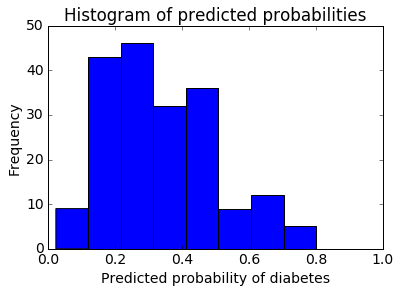

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.size"]=14
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [50]:
#the default threshold is 0.5, thus all cases were predicted as 0 (non-diabetes)
#if we could adjust threshold,then we could adjust sensitivity and precision
#decrease threshold, increase sensitivity, because now classifier is more sensive to positive cases
#predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class=binarize(y_pred_prob, 0.3)[0]

c:\users\lisa\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [52]:
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [53]:
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [54]:
#previous confusion matrix(default threshold of 0.5)
print (confusion)

[[118  12]
 [ 47  15]]


In [56]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [57]:
#sensitivity has increased (used to be 0.24)
print (46/float(46+16))

0.7419354838709677


In [58]:
#specificity has decreased (used to be 0.91)
print (80/float(80+50))

0.6153846153846154


In [59]:
#sensitivity and specificity have an inverse relationship
#adjusting threshold should be last step in  your model adjusting, the majority of your time should be spending on selecting the best model

# ROC curves and area  under the curve(AUC)

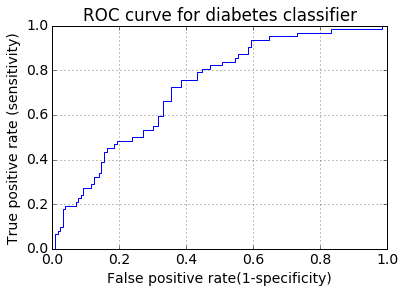

In [60]:
#wouldn't it be nice if we could see how sensitivity and specificity are affected by various threshold, without actually changing
#the threshold
#just plot the ROC curve
fpr, tpr, thresholds=metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False positive rate(1-specificity)")
plt.ylabel("True positive rate (sensitivity)")
plt.grid(True)

In [72]:
 #define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print ("sensitivity:", tpr[thresholds>threshold][-1])
    print ("specificity:", 1-fpr[thresholds > threshold][-1])

In [74]:
evaluate_threshold(0.5)

sensitivity: 0.241935483871
specificity: 0.907692307692


In [75]:
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


AUC is useful as a single number summary of classifier performance.
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [76]:
#calculate cross_validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring="roc_auc").mean()

0.73782336182336183

Confusion matrix advantages:
Allows you to calculate a variety of metrics
Useful for multi-class problems (more than two response classes)
ROC/AUC advantages:
Does not require you to set a classification threshold
Still useful when there is high class imbalance